In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

### Steps for Multi Linear Regression:

1. Reading and understanding data
2. Data preparation
3. Splitting train and test data
4. Feature selection
5. Model building
6. Model evaluation on train data
7. Model evaluation on test data

1. Reading and Understanding data

In [5]:
bikedf = pd.read_csv("day.csv")

In [6]:
bikedf.shape

(730, 16)

In [7]:
bikedf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
bikedf["holiday"].value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [9]:
bikedf["workingday"].value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

In [10]:
bikedf["weekday"].value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [11]:
bikedf.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [12]:
bikedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


From the above it is clear that no columns have null/missing values. Also there is no need of data type conversion 

Step-2: Data preparation

 #Dropping below columns are they are no significant for model building
 1. instant column which is just record number,
 2. atemp which is highly corelated with temp
 3. dteday column as it is redundant (year and month are already in another columns)
 4. holiday since it is already part of workingday
 5. casual as it is part of count

In [16]:
bikedf=bikedf.drop(["dteday","instant", "atemp", "holiday", "casual"], axis=1)
bikedf.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,registered,cnt
0,1,0,1,6,0,2,14.110847,80.5833,10.749882,654,985
1,1,0,1,0,0,2,14.902598,69.6087,16.652113,670,801
2,1,0,1,1,1,1,8.050924,43.7273,16.636703,1229,1349
3,1,0,1,2,1,1,8.200000,59.0435,10.739832,1454,1562
4,1,0,1,3,1,1,9.305237,43.6957,12.522300,1518,1600


In [17]:
bikedf.columns

Index(['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp',
       'hum', 'windspeed', 'registered', 'cnt'],
      dtype='object')

#Drawing Scatter plot to see how the features are inter related

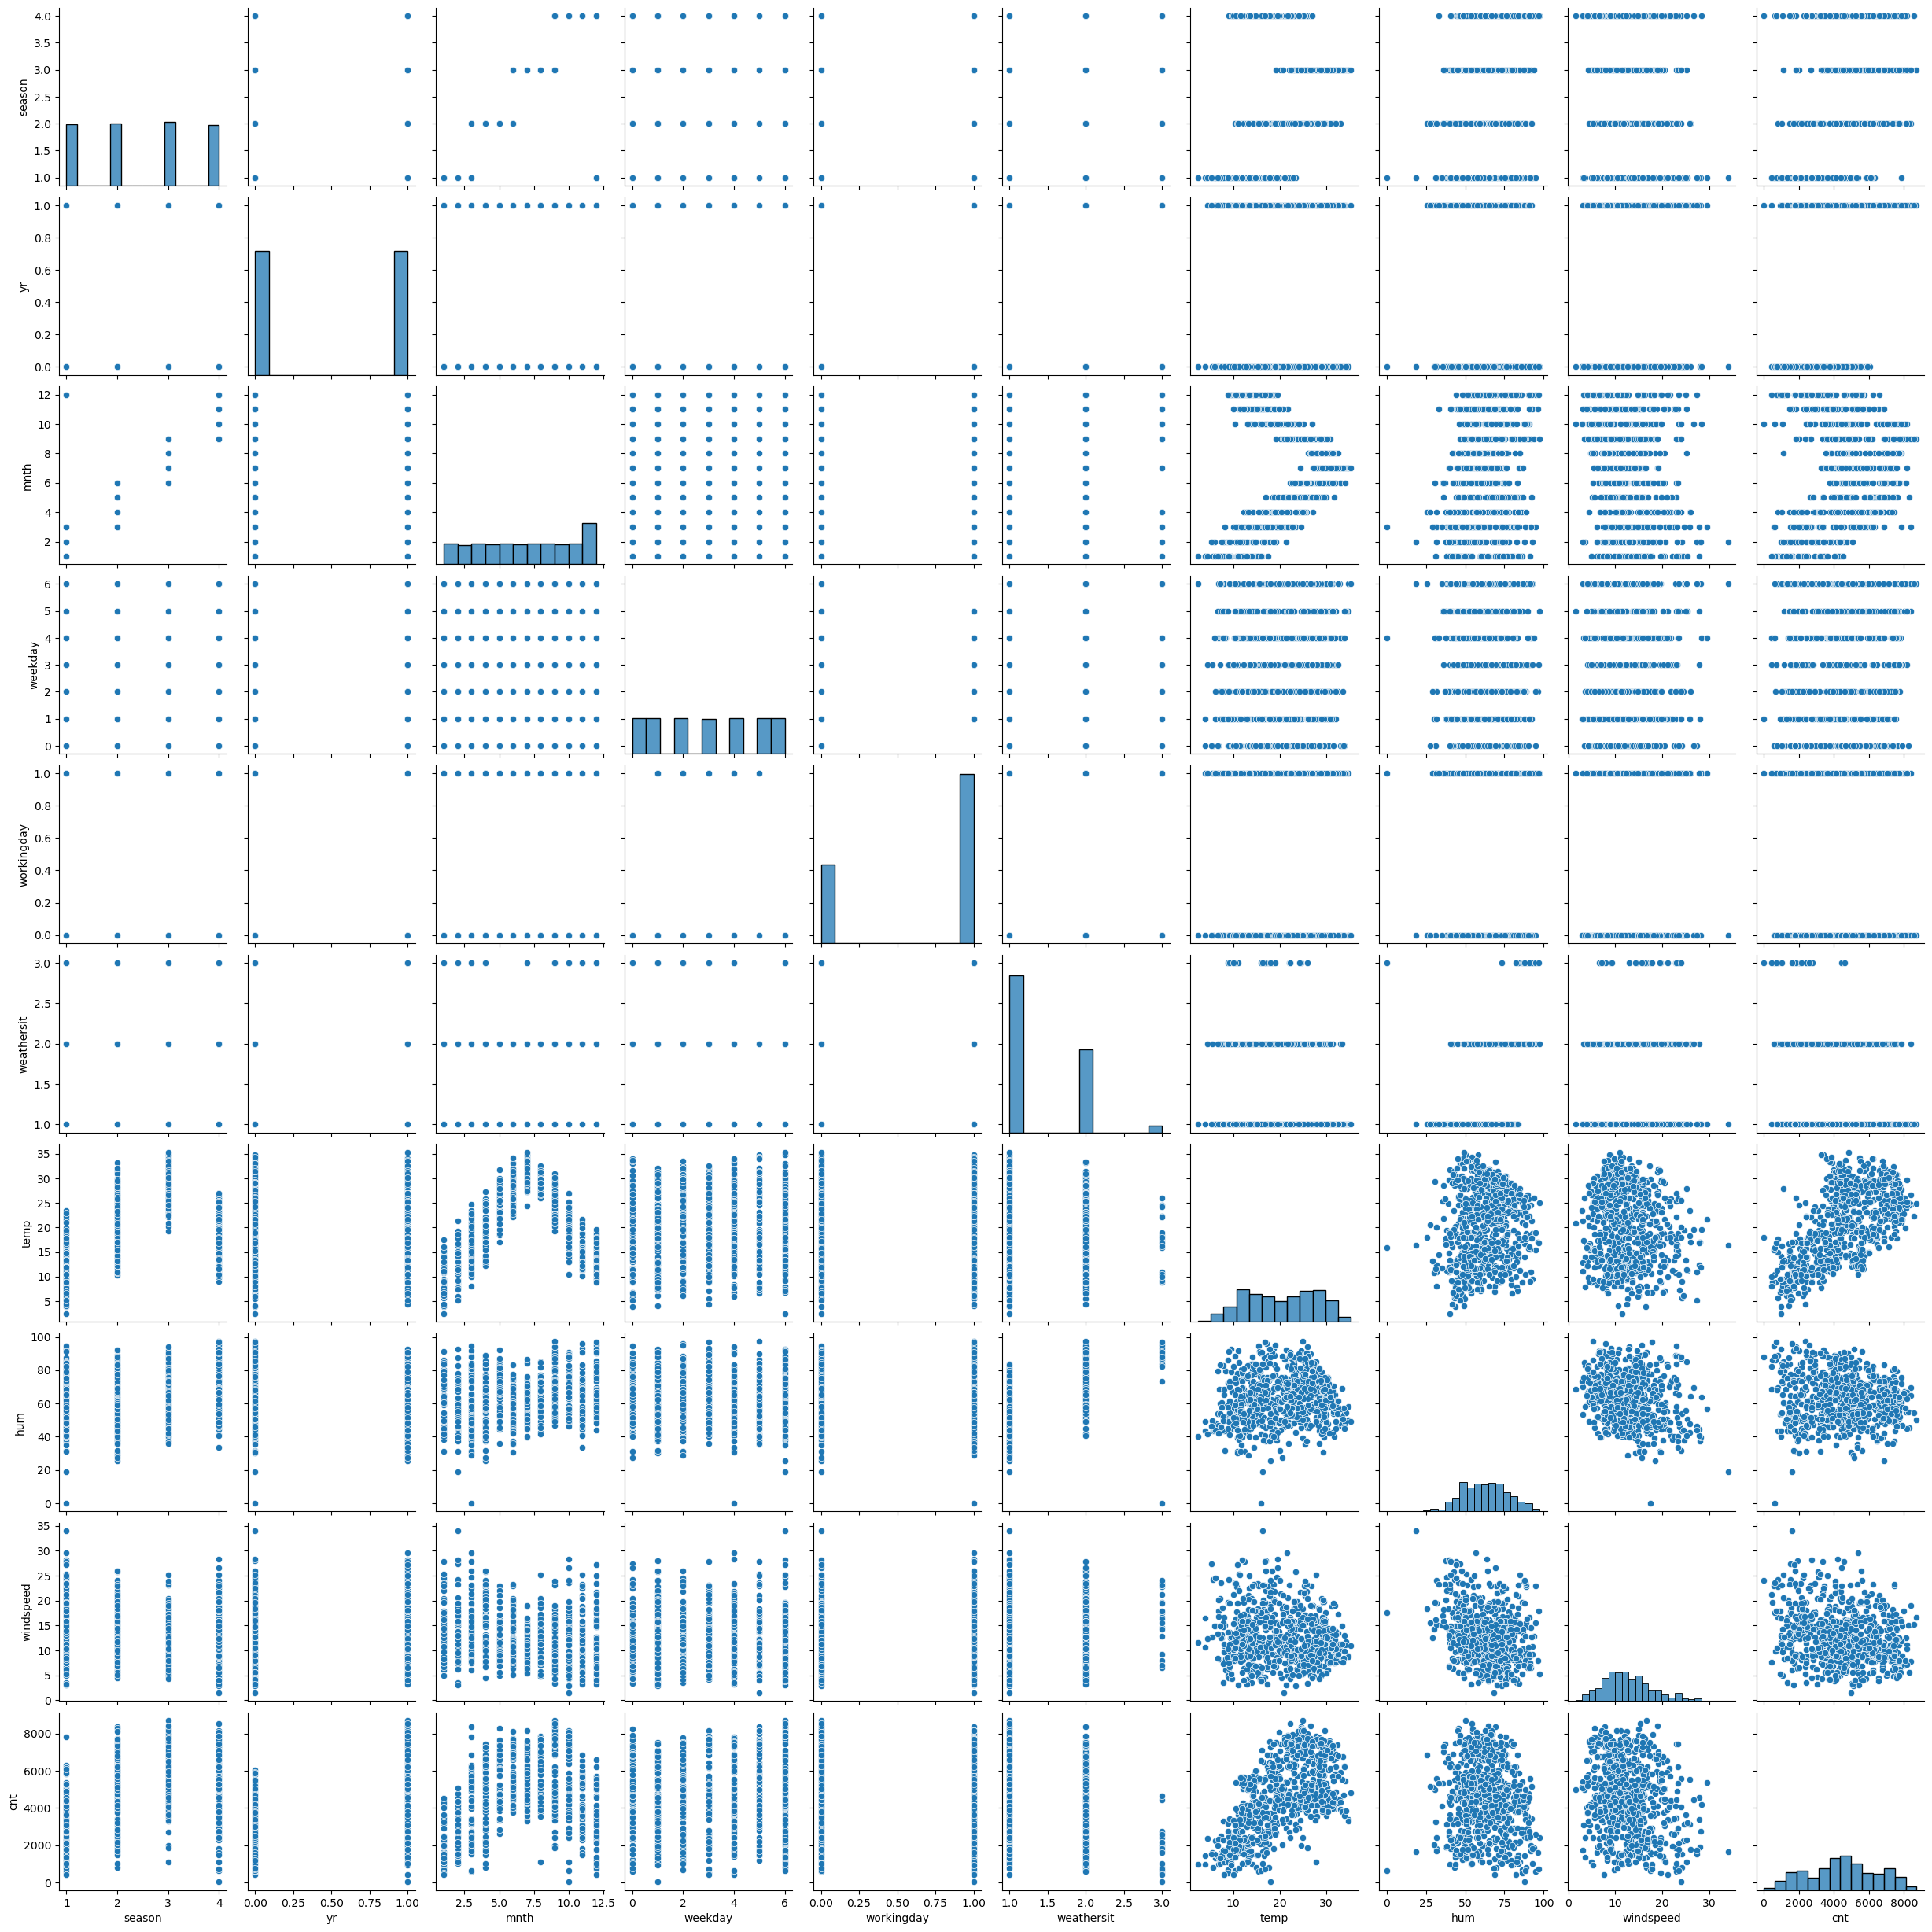

In [19]:
plt_cols=bikedf.drop(["registered"], axis=1)
sns.pairplot(data=plt_cols)
plt.show()

##Plotting box plot for categorical columns

<Axes: xlabel='weathersit', ylabel='cnt'>

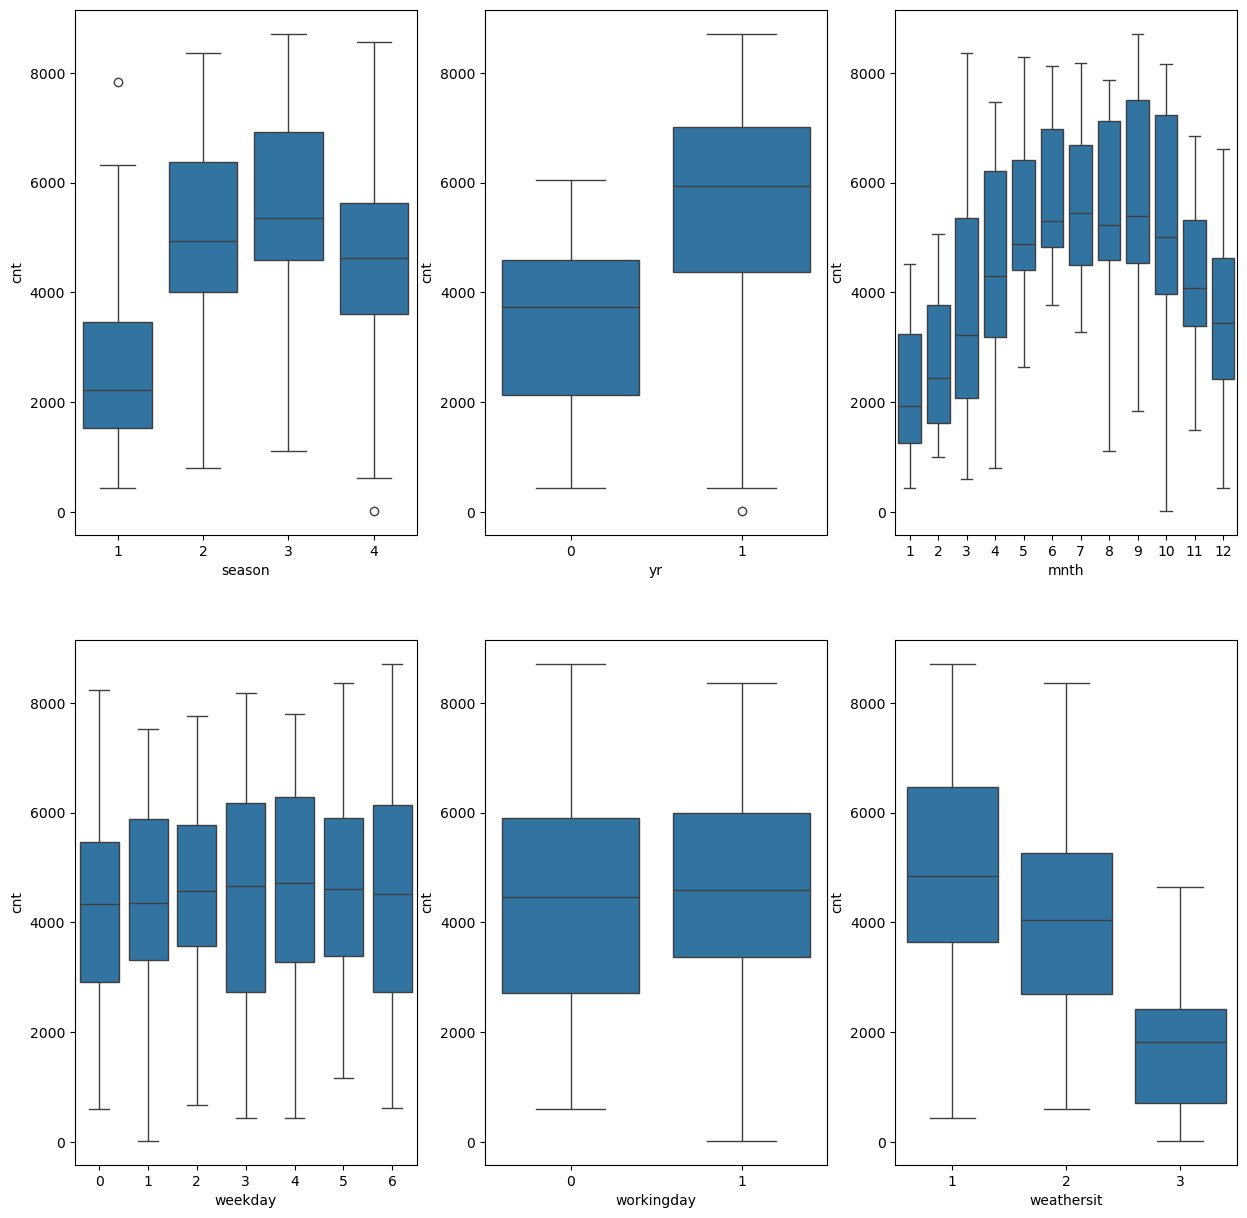

In [21]:
plt.figure(figsize=(15,15))
plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt',data=bikedf)
plt.subplot(2,3,2)
sns.boxplot(y='cnt', x='yr',data=bikedf)
plt.subplot(2,3,3)
sns.boxplot(y='cnt', x='mnth',data=bikedf)
plt.subplot(2,3,4)
sns.boxplot(y='cnt', x='weekday',data=bikedf)
plt.subplot(2,3,5)
sns.boxplot(y='cnt', x='workingday',data=bikedf)
plt.subplot(2,3,6)
sns.boxplot(y='cnt', x='weathersit',data=bikedf)

From the above box plots it is evident that count is more in summer and fall, in 2019, from june till october and when the weather is clear

Create Dummy variables for categorical variables:

In [24]:
bikedf["season"]=bikedf["season"].map({1: "spring" , 2:"summer", 3:"fall", 4:"winter"})
bikedf.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,registered,cnt
0,spring,0,1,6,0,2,14.110847,80.5833,10.749882,654,985
1,spring,0,1,0,0,2,14.902598,69.6087,16.652113,670,801
2,spring,0,1,1,1,1,8.050924,43.7273,16.636703,1229,1349
3,spring,0,1,2,1,1,8.200000,59.0435,10.739832,1454,1562
4,spring,0,1,3,1,1,9.305237,43.6957,12.522300,1518,1600


In [25]:
seasons=pd.get_dummies(bikedf['season'], dtype=int, drop_first=True)
seasons.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [26]:
bikedf=pd.concat([bikedf,seasons], axis=1)
bikedf.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,registered,cnt,spring,summer,winter
0,spring,0,1,6,0,2,14.110847,80.5833,10.749882,654,985,1,0,0
1,spring,0,1,0,0,2,14.902598,69.6087,16.652113,670,801,1,0,0
2,spring,0,1,1,1,1,8.050924,43.7273,16.636703,1229,1349,1,0,0
3,spring,0,1,2,1,1,8.200000,59.0435,10.739832,1454,1562,1,0,0
4,spring,0,1,3,1,1,9.305237,43.6957,12.522300,1518,1600,1,0,0


In [27]:
bikdedf=bikedf.drop("season",axis=1,inplace=True)
bikedf.head()

,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,registered,cnt,spring,summer,winter
0,0,1,6,0,2,14.110847,80.5833,10.749882,654,985,1,0,0
1,0,1,0,0,2,14.902598,69.6087,16.652113,670,801,1,0,0
2,0,1,1,1,1,8.050924,43.7273,16.636703,1229,1349,1,0,0
3,0,1,2,1,1,8.200000,59.0435,10.739832,1454,1562,1,0,0
4,0,1,3,1,1,9.305237,43.6957,12.522300,1518,1600,1,0,0


In [28]:
bikedf["weathersit"].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [29]:
bikedf["weathersit"]=bikedf["weathersit"].map({1: "clear" , 2:"mist", 3:"snow", 4:"rain"})
weathersit_list=pd.get_dummies(bikedf['weathersit'], dtype=int, drop_first=True)
bikedf=pd.concat([bikedf,weathersit_list], axis=1)
bikdedf=bikedf.drop("weathersit",axis=1,inplace=True)
bikedf.head()

,yr,mnth,weekday,workingday,temp,hum,windspeed,registered,cnt,spring,summer,winter,mist,snow
0,0,1,6,0,14.110847,80.5833,10.749882,654,985,1,0,0,1,0
1,0,1,0,0,14.902598,69.6087,16.652113,670,801,1,0,0,1,0
2,0,1,1,1,8.050924,43.7273,16.636703,1229,1349,1,0,0,0,0
3,0,1,2,1,8.200000,59.0435,10.739832,1454,1562,1,0,0,0,0
4,0,1,3,1,9.305237,43.6957,12.522300,1518,1600,1,0,0,0,0


In [30]:
bikedf["mnth"]=bikedf["mnth"].map({1: "jan" , 2:"feb", 3:"mar", 4:"apr", 5:"may", 6: "jun", 7:"jul", 8: "aug", 9: "sep", 10: "oct", 11: "nov", 12: "dec"})
months=pd.get_dummies(bikedf['mnth'], dtype=int, drop_first=True)
bikedf=pd.concat([bikedf,months], axis=1)
bikdedf=bikedf.drop("mnth",axis=1,inplace=True)
bikedf.head()

,yr,weekday,workingday,temp,hum,windspeed,registered,cnt,spring,summer,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,6,0,14.110847,80.5833,10.749882,654,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,670,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,1,8.050924,43.7273,16.636703,1229,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,2,1,8.200000,59.0435,10.739832,1454,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,3,1,9.305237,43.6957,12.522300,1518,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


In [31]:
bikedf["weekday"].value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [32]:
bikedf["weekday"]=bikedf["weekday"].map({1: "wed" , 2:"thurs", 3:"fri", 4:"sat", 5:"sun", 6: "mon", 0:"tues"})
days=pd.get_dummies(bikedf['weekday'], dtype=int, drop_first=True)
bikedf=pd.concat([bikedf,days], axis=1)
bikdedf=bikedf.drop("weekday",axis=1,inplace=True)
bikedf.head()

,yr,workingday,temp,hum,windspeed,registered,cnt,spring,summer,winter,...,may,nov,oct,sep,mon,sat,sun,thurs,tues,wed
0,0,0,14.110847,80.5833,10.749882,654,985,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,14.902598,69.6087,16.652113,670,801,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,8.050924,43.7273,16.636703,1229,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,8.200000,59.0435,10.739832,1454,1562,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,9.305237,43.6957,12.522300,1518,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
bikedf.head()

,yr,workingday,temp,hum,windspeed,registered,cnt,spring,summer,winter,...,may,nov,oct,sep,mon,sat,sun,thurs,tues,wed
0,0,0,14.110847,80.5833,10.749882,654,985,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,14.902598,69.6087,16.652113,670,801,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,8.050924,43.7273,16.636703,1229,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,8.200000,59.0435,10.739832,1454,1562,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,9.305237,43.6957,12.522300,1518,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
bikedf_train, bikedf_test=train_test_split(bikedf, train_size=0.70, random_state=100)
print(bikedf_train.shape)
print(bikedf_test.shape)

(510, 29)
(220, 29)


In [35]:
bikedf_train.head()

,yr,workingday,temp,hum,windspeed,registered,cnt,spring,summer,winter,...,may,nov,oct,sep,mon,sat,sun,thurs,tues,wed
576,1,1,29.246653,70.4167,11.083475,6248,7216,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,16.980847,62.1250,10.792293,3110,4066,1,0,0,...,0,0,0,0,1,0,0,0,0,0
728,1,0,10.489153,48.3333,23.500518,1432,1796,1,0,0,...,0,0,0,0,0,0,0,0,1,0
482,1,0,15.443347,48.9583,8.708325,3100,4220,0,1,0,...,0,0,0,0,1,0,0,0,0,0
111,0,1,13.803347,72.9583,14.707907,1506,1683,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [36]:
print(bikedf_train.columns)

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'registered', 'cnt',
       'spring', 'summer', 'winter', 'mist', 'snow', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'sat',
       'sun', 'thurs', 'tues', 'wed'],
      dtype='object')


In [37]:
scaler = MinMaxScaler()
num_vars = ['temp','hum', 'windspeed', 'registered', 'cnt']
bikedf_train[num_vars]= scaler.fit_transform(bikedf_train[num_vars])
bikedf_train.head()

,yr,workingday,temp,hum,windspeed,registered,cnt,spring,summer,winter,...,may,nov,oct,sep,mon,sat,sun,thurs,tues,wed
576,1,1,0.815169,0.725633,0.264686,0.899220,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0.442393,0.640189,0.255342,0.446145,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,0
728,1,0,0.245101,0.498067,0.663106,0.203869,0.204096,1,0,0,...,0,0,0,0,0,0,0,0,1,0
482,1,0,0.395666,0.504508,0.188475,0.444701,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,0
111,0,1,0.345824,0.751824,0.380981,0.214554,0.191095,0,1,0,...,0,0,0,0,0,0,1,0,0,0


### STEP -3 : TRAINING THE MODEL

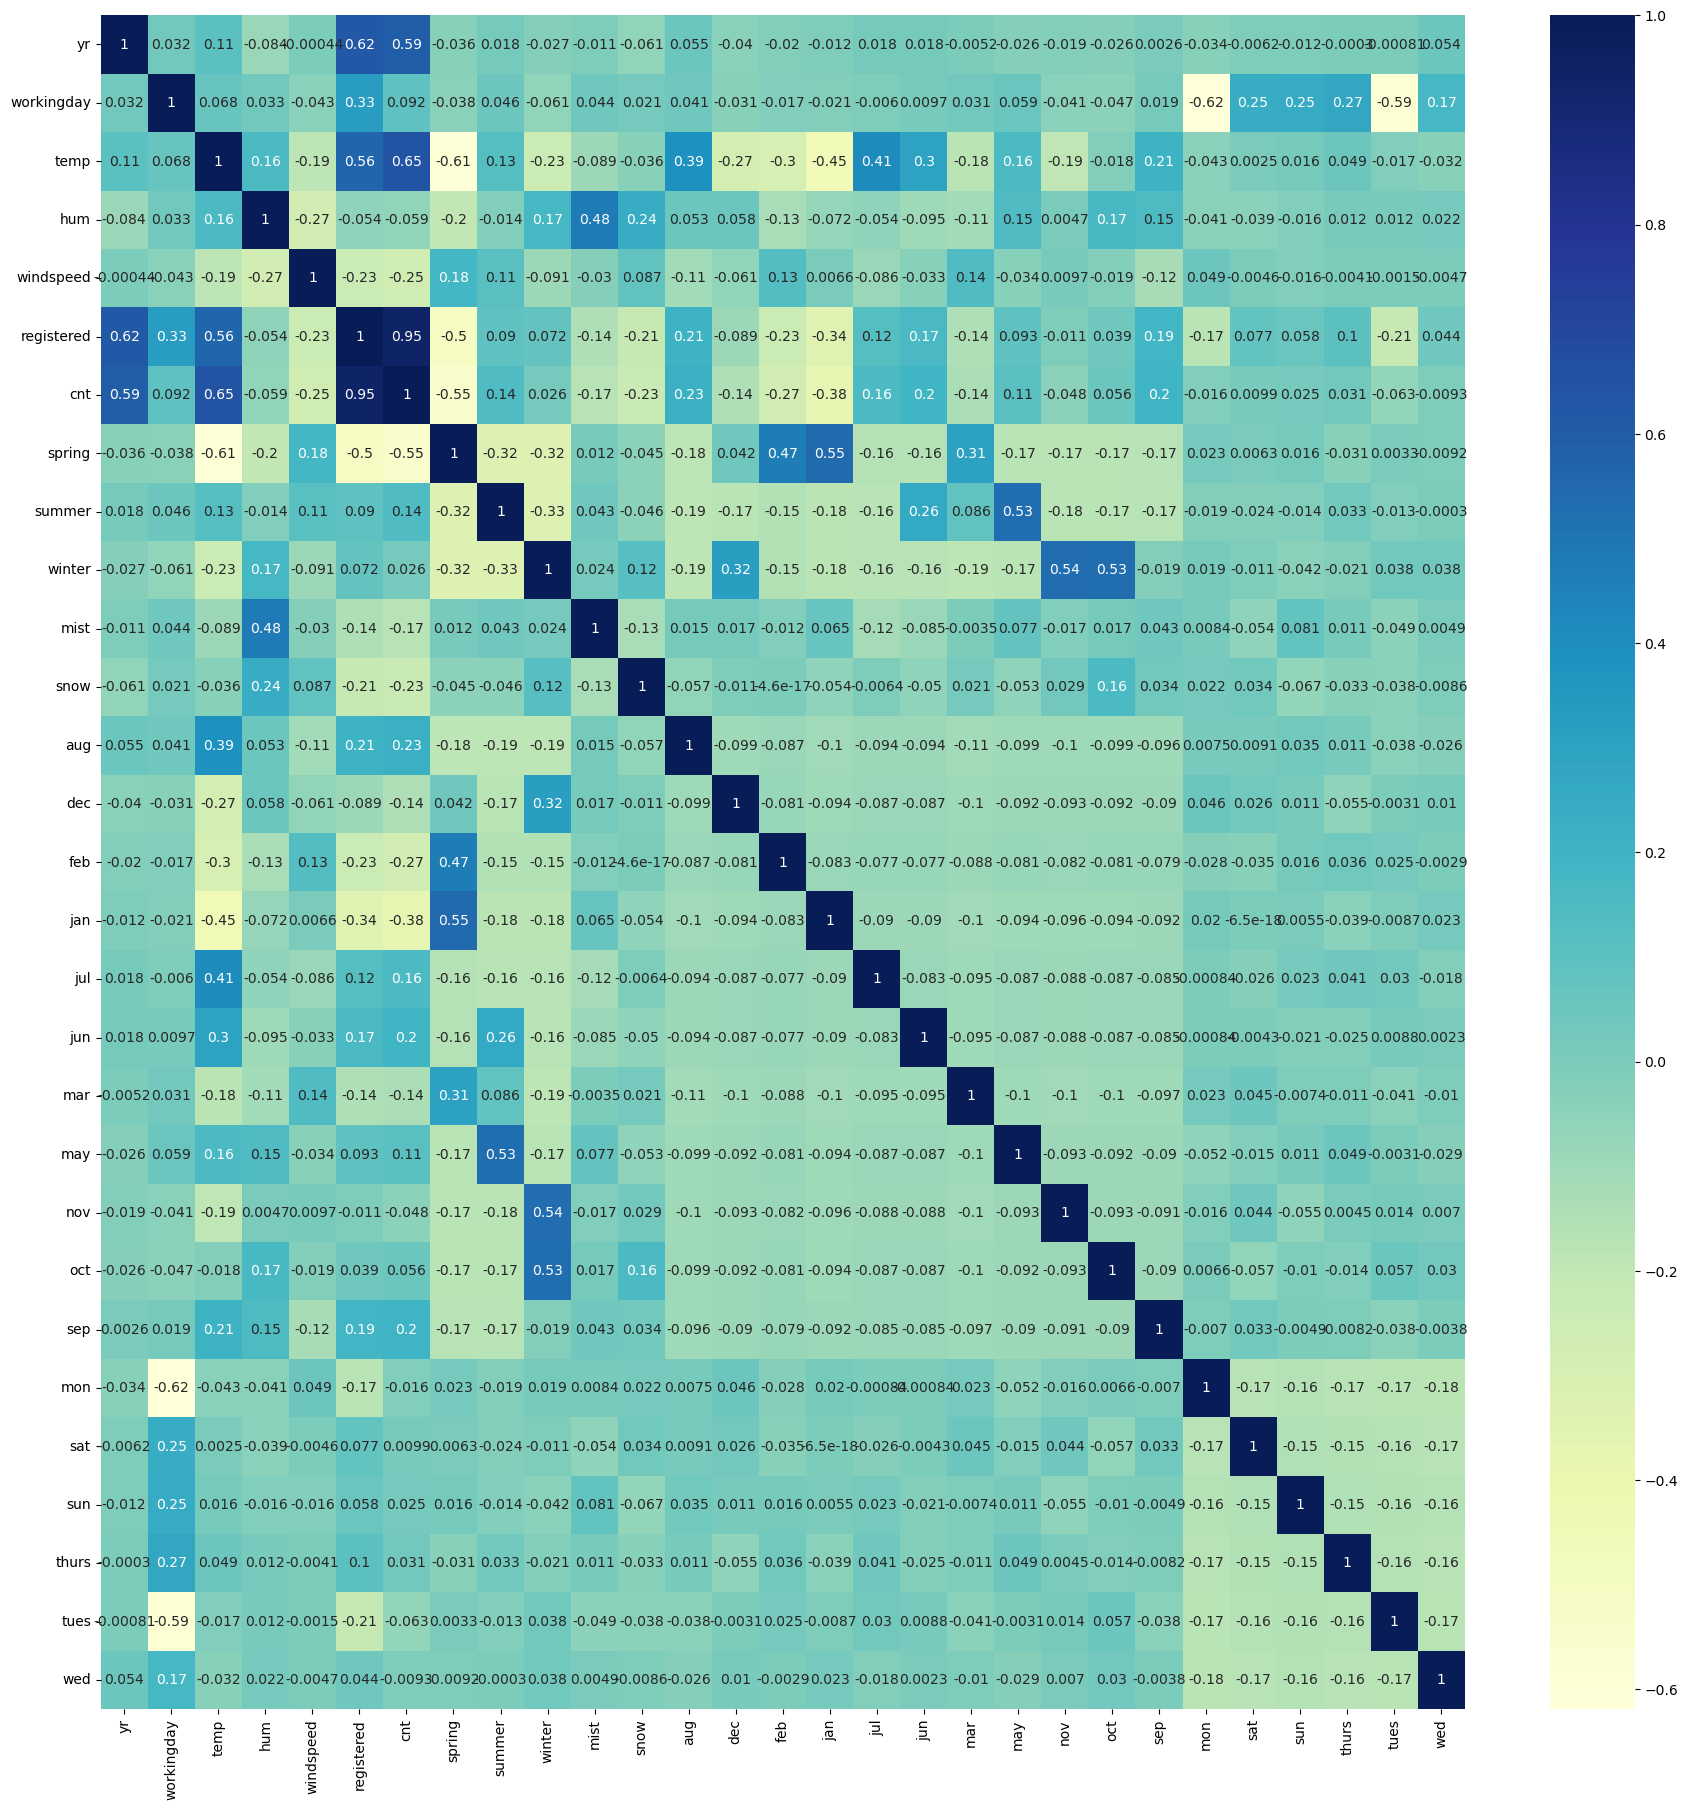

In [39]:
plt.figure(figsize = (22, 22))
sns.heatmap(bikedf_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

#From the above Heatmap, it is evident that count is more corelated with year, temperature, registered. It is negatively corelated with humidity, windspeed, sprint, mist and snow

#Add constant for statsmodel 

In [42]:
y_train = bikedf_train.pop('cnt')
X_train = bikedf_train
X_train_sm = sm.add_constant(bikedf_train)
X_train_sm.head()

,const,yr,workingday,temp,hum,windspeed,registered,spring,summer,winter,...,may,nov,oct,sep,mon,sat,sun,thurs,tues,wed
576,1.0,1,1,0.815169,0.725633,0.264686,0.899220,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0.446145,1,0,0,...,0,0,0,0,1,0,0,0,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,0.203869,1,0,0,...,0,0,0,0,0,0,0,0,1,0
482,1.0,1,0,0.395666,0.504508,0.188475,0.444701,0,1,0,...,0,0,0,0,1,0,0,0,0,0
111,1.0,0,1,0.345824,0.751824,0.380981,0.214554,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [43]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [44]:
lm=LinearRegression()
lm.fit(X_train, y_train)
rfe=RFE(lm,step=15)
rfe=rfe.fit(X_train, y_train)

In [45]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', False, 2),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('registered', True, 1),
 ('spring', False, 2),
 ('summer', True, 1),
 ('winter', False, 2),
 ('mist', False, 2),
 ('snow', True, 1),
 ('aug', False, 2),
 ('dec', True, 1),
 ('feb', True, 1),
 ('jan', False, 2),
 ('jul', False, 2),
 ('jun', True, 1),
 ('mar', False, 2),
 ('may', False, 2),
 ('nov', False, 2),
 ('oct', True, 1),
 ('sep', False, 2),
 ('mon', True, 1),
 ('sat', False, 2),
 ('sun', True, 1),
 ('thurs', False, 2),
 ('tues', True, 1),
 ('wed', False, 2)]

In [46]:
X_train.columns[~rfe.support_]

Index(['yr', 'spring', 'winter', 'mist', 'aug', 'jan', 'jul', 'mar', 'may',
       'nov', 'sep', 'sat', 'thurs', 'wed'],
      dtype='object')

In [47]:
col = X_train.columns[rfe.support_]

In [48]:
import statsmodels.api as sm

In [49]:
X_train_rfe=X_train[col]
X_train_rfe_sm=sm.add_constant(X_train_rfe)
X_train_rfe_sm.head()

,const,workingday,temp,hum,windspeed,registered,summer,snow,dec,feb,jun,oct,mon,sun,tues
576,1.0,1,0.815169,0.725633,0.264686,0.899220,0,0,0,0,0,0,0,0,0
426,1.0,0,0.442393,0.640189,0.255342,0.446145,0,0,0,0,0,0,1,0,0
728,1.0,0,0.245101,0.498067,0.663106,0.203869,0,0,1,0,0,0,0,0,1
482,1.0,0,0.395666,0.504508,0.188475,0.444701,1,0,0,0,0,0,1,0,0
111,1.0,1,0.345824,0.751824,0.380981,0.214554,1,0,0,0,0,0,0,1,0


In [50]:
lm = sm.OLS(y_train, X_train_rfe_sm).fit()

In [51]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     1221.
Date:                Tue, 24 Sep 2024   Prob (F-statistic):               0.00
Time:                        21:06:23   Log-Likelihood:                 949.32
No. Observations:                 510   AIC:                            -1869.
Df Residuals:                     495   BIC:                            -1805.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0373      0.015      2.438      0.0

In [52]:
vif= pd.DataFrame()
vif['Features']=X_train_rfe_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe_sm.values, i) for i in range(X_train_rfe_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
0,const,81.79
1,workingday,9.27
12,mon,6.05
14,tues,5.72
2,temp,2.01
5,registered,1.98
3,hum,1.32
8,dec,1.22
4,windspeed,1.21
6,summer,1.21


In [53]:
lr = sm.OLS(y_train, X_train_rfe_sm)
lr_model=lr.fit()
lr_model.params

const         0.037277
workingday   -0.068126
temp          0.121672
hum          -0.047911
windspeed    -0.046288
registered    0.919301
summer        0.028560
snow         -0.012789
dec          -0.021240
feb          -0.009521
jun          -0.012117
oct           0.017508
mon           0.050924
sun           0.019043
tues          0.044035
dtype: float64

In [54]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     1221.
Date:                Tue, 24 Sep 2024   Prob (F-statistic):               0.00
Time:                        21:06:23   Log-Likelihood:                 949.32
No. Observations:                 510   AIC:                            -1869.
Df Residuals:                     495   BIC:                            -1805.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0373      0.015      2.438      0.015       0.007       0.067
workingday    -0.0681      0.011     -6.191      0.000      -0.090      -0.047
temp           0.1217      0.011     11.466      0.000       0.101       0.143
hum           -0.0479      0.013     -3.594      0.000      -0.074      -0.022
windspeed     -0.0463      0.011     -4.219      0.000      -0.068      -0.025
registered     0.9193      0.010     87.980      0.000       0.899       0.940
summer         0.0286      0.004      6.613      0.000       0.020       0.037
snow          -0.0128      0.011     -1.178      0.239      -0.034       0.009
dec           -0.0212      0.007     -3.165      0.002      -0.034      -0.008
feb           -0.0095      0.007     -1.281      0.201      -0.024       0.005
jun           -0.0121      0.007     -1.737      0.083      -0.026       0.002
oct            0.0175      0.007      2.676      0.008       0.005       0.030
mon            0.0509      0.011      4.431      0.000       0.028       0.074
sun            0.0190      0.005      3.612      0.000       0.009       0.029
tues           0.0440      0.012      3.813      0.000       0.021       0.067
==============================================================================
Omnibus:                       80.074   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.861
Skew:                           0.890   Prob(JB):                     1.43e-34
Kurtosis:                       5.041   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
X_train_rfe_sm = X_train_rfe_sm.drop("workingday", axis=1)
lr = sm.OLS(y_train, X_train_rfe_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1220.
Date:                Tue, 24 Sep 2024   Prob (F-statistic):               0.00
Time:                        21:06:45   Log-Likelihood:                 930.30
No. Observations:                 510   AIC:                            -1833.
Df Residuals:                     496   BIC:                            -1773.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0208      0.013     -1.661      0.097      -0.045       0.004
temp           0.1247      0.011     11.344      0.000       0.103       0.146
hum           -0.0514      0.014     -3.723      0.000      -0.079      -0.024
windspeed     -0.0475      0.011     -4.175      0.000      -0.070      -0.025
registered     0.9092      0.011     84.954      0.000       0.888       0.930
summer         0.0273      0.004      6.113      0.000       0.019       0.036
snow          -0.0174      0.011     -1.547      0.123      -0.039       0.005
dec           -0.0215      0.007     -3.084      0.002      -0.035      -0.008
feb           -0.0089      0.008     -1.154      0.249      -0.024       0.006
jun           -0.0131      0.007     -1.809      0.071      -0.027       0.001
oct            0.0184      0.007      2.713      0.007       0.005       0.032
mon            0.1149      0.005     22.008      0.000       0.105       0.125
sun            0.0169      0.005      3.099      0.002       0.006       0.028
tues           0.1076      0.005     19.619      0.000       0.097       0.118
==============================================================================
Omnibus:                       86.213   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.418
Skew:                           0.963   Prob(JB):                     3.27e-36
Kurtosis:                       4.995   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
vif= pd.DataFrame()
vif['Features']=X_train_rfe_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe_sm.values, i) for i in range(X_train_rfe_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
0,const,51.01
1,temp,2.00
4,registered,1.93
2,hum,1.32
7,dec,1.22
3,windspeed,1.21
5,summer,1.21
8,feb,1.20
9,jun,1.20
13,tues,1.20


In [126]:
X_train_rfe_sm = X_train_rfe_sm.drop("feb", axis=1)
lr = sm.OLS(y_train, X_train_rfe_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1321.
Date:                Tue, 24 Sep 2024   Prob (F-statistic):               0.00
Time:                        21:14:47   Log-Likelihood:                 929.62
No. Observations:                 510   AIC:                            -1833.
Df Residuals:                     497   BIC:                            -1778.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0239      0.012     -1.951      0.052      -0.048       0.000
temp           0.1275      0.011     11.880      0.000       0.106       0.149
hum           -0.0508      0.014     -3.680      0.000      -0.078      -0.024
windspeed     -0.0483      0.011     -4.253      0.000      -0.071      -0.026
registered     0.9100      0.011     85.155      0.000       0.889       0.931
summer         0.0283      0.004      6.433      0.000       0.020       0.037
snow          -0.0172      0.011     -1.535      0.126      -0.039       0.005
dec           -0.0199      0.007     -2.914      0.004      -0.033      -0.006
jun           -0.0134      0.007     -1.856      0.064      -0.028       0.001
oct            0.0194      0.007      2.875      0.004       0.006       0.033
mon            0.1152      0.005     22.084      0.000       0.105       0.125
sun            0.0168      0.005      3.079      0.002       0.006       0.028
tues           0.1076      0.005     19.611      0.000       0.097       0.118
==============================================================================
Omnibus:                       85.413   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.388
Skew:                           0.959   Prob(JB):                     1.49e-35
Kurtosis:                       4.967   Cond. No.                         16.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
vif= pd.DataFrame()
vif['Features']=X_train_rfe_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe_sm.values, i) for i in range(X_train_rfe_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
0,const,48.70
4,registered,1.92
1,temp,1.91
2,hum,1.32
3,windspeed,1.21
8,jun,1.20
12,tues,1.20
5,summer,1.17
6,snow,1.17
7,dec,1.17


In [130]:
y_train_pred = lr_model.predict(X_train_rfe_sm)
r2_score(y_true=y_train, y_pred=y_train_pred)

0.9695907058403258

<Axes: ylabel='Density'>

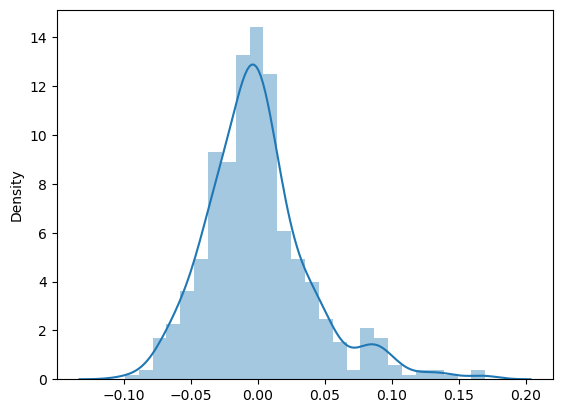

In [132]:
#y_train_pred = lr_model.predict(X_train_sm)
res = y_train - y_train_pred
sns.distplot(res)

### Step -4: Test set prediction and Evaluation on the test data set:

In [134]:
scaler = MinMaxScaler()
num_vars = ['temp','hum', 'windspeed', 'registered', 'cnt']
bikedf_test[num_vars]= scaler.fit_transform(bikedf_test[num_vars])
bikedf_test.head()

,yr,workingday,temp,hum,windspeed,registered,cnt,spring,summer,winter,...,may,nov,oct,sep,mon,sat,sun,thurs,tues,wed
184,0,0,0.837241,0.534223,0.149393,0.397068,0.704300,0,0,0,...,0,0,0,0,0,0,0,0,0,1
535,1,1,0.911423,0.470417,0.231142,0.765284,0.725421,0,1,0,...,0,0,0,0,0,0,0,0,0,0
299,0,1,0.496221,0.777843,0.443398,0.309888,0.278853,0,0,1,...,0,0,1,0,0,1,0,0,0,0
221,0,1,0.890387,0.236659,0.449707,0.540237,0.545512,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,1,0.821739,0.070765,0.682387,0.592639,0.569148,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [136]:
X_test=bikedf_test
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,workingday,temp,hum,windspeed,registered,cnt,spring,summer,...,may,nov,oct,sep,mon,sat,sun,thurs,tues,wed
184,1.0,0,0,0.837241,0.534223,0.149393,0.397068,0.704300,0,0,...,0,0,0,0,0,0,0,0,0,1
535,1.0,1,1,0.911423,0.470417,0.231142,0.765284,0.725421,0,1,...,0,0,0,0,0,0,0,0,0,0
299,1.0,0,1,0.496221,0.777843,0.443398,0.309888,0.278853,0,0,...,0,0,1,0,0,1,0,0,0,0
221,1.0,0,1,0.890387,0.236659,0.449707,0.540237,0.545512,0,0,...,0,0,0,0,0,0,0,0,0,0
152,1.0,0,1,0.821739,0.070765,0.682387,0.592639,0.569148,0,1,...,0,0,0,0,0,1,0,0,0,0


In [138]:
print(X_train_rfe_sm.shape)
print(X_test_sm.shape)

(510, 13)
(220, 30)


In [140]:
X_test_sm=X_test_sm.drop(['yr', 'workingday', 'feb', 'spring', 'winter', 'mist', 'aug', 'jan', 'jul', 'mar', 'may', 'nov', 'sep', 'sat', 'thurs', 'wed'], axis=1)
#X_test_sm.columns

In [142]:
X_test_sm.columns

Index(['const', 'temp', 'hum', 'windspeed', 'registered', 'cnt', 'summer',
       'snow', 'dec', 'jun', 'oct', 'mon', 'sun', 'tues'],
      dtype='object')

Drop the to be predicted feature cnt

In [144]:
y_test=X_test_sm.pop("cnt")
y_test_pred=lr_model.predict(X_test_sm)

In [146]:
y_test_pred

184    0.409808
535    0.768501
299    0.279786
221    0.547474
152    0.598481
         ...   
702    0.766012
127    0.506841
640    0.956892
72     0.161804
653    0.894456
Length: 220, dtype: float64

In [148]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.9448059531542987

<Axes: ylabel='Density'>

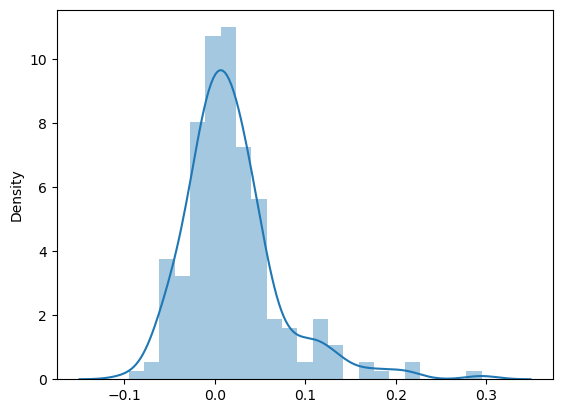

In [150]:
res = y_test - y_test_pred
sns.distplot(res)

Text(0, 0.5, 'y_test_pred')

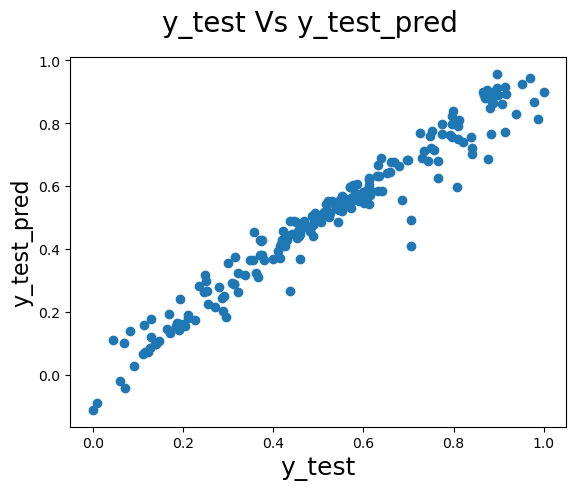

In [152]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test Vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)

### Conclusion:  

From the above analysis, R2 of the test sample is 0.944 which is good value, P-value for all the variables is ~0 and also the VIF value is <5. The residual plot is normal distribution. 
Hence this model can be considered as a good model